# Exploratory Data Analysis (EDA) on Munich Alcohol-Related Traffic Accidents

In [62]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [64]:
file_path = "monatszahlen2510_verkehrsunfaelle_30_10_25.csv"
df = pd.read_csv(file_path)

df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2025,202501,NaN,24.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2025,202502,NaN,28.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2025,202503,NaN,25.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2025,202504,NaN,38.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2025,202505,NaN,32.0,NaN,NaN,NaN


<h2> Removing Rows after 2020 </h2>

In [65]:
df1 = df[df["JAHR"] <= 2020]

df1["JAHR"].value_counts().sort_index()

JAHR
2000    84
2001    91
2002    91
2003    91
2004    91
2005    91
2006    91
2007    91
2008    91
2009    91
2010    91
2011    91
2012    91
2013    91
2014    91
2015    91
2016    91
2017    91
2018    91
2019    91
2020    91
Name: count, dtype: int64

In [66]:
df.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      84
VERAEND_VORMONAT_PROZENT          260
VERAEND_VORJAHRESMONAT_PROZENT    169
ZWOELF_MONATE_MITTELWERT          252
dtype: int64

<h3> Getting rid of Summe row as it is redundant </h3>

In [67]:
df = df[df["MONAT"] != "Summe"]

In [68]:
df.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      84
VERAEND_VORMONAT_PROZENT           92
VERAEND_VORJAHRESMONAT_PROZENT    169
ZWOELF_MONATE_MITTELWERT           84
dtype: int64

## Dropping months that have no WERTH


In [69]:
df1 = df.dropna(subset=['WERT'])
df1.isnull().sum()

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                               0
VORJAHRESWERT                     84
VERAEND_VORMONAT_PROZENT           8
VERAEND_VORJAHRESMONAT_PROZENT    85
ZWOELF_MONATE_MITTELWERT           0
dtype: int64

In [70]:
df1['DATUM'] = pd.to_datetime(df1['MONAT'], format='%Y%m')
df1 = df1.sort_values('DATUM').set_index('DATUM')
df1 = df1.drop(columns=['MONAT'])
df1.head(12)

C:\Users\Sai\AppData\Local\Temp\ipykernel_28156\958692136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATUM'] = pd.to_datetime(df1['MONAT'], format='%Y%m')


,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
DATUM,,,,,,,,
2000-01-01,Fluchtunfälle,insgesamt,2000,835.0,NaN,NaN,NaN,835.0
2000-01-01,Alkoholunfälle,Verletzte und Getötete,2000,37.0,NaN,NaN,NaN,37.0
2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,34.0,NaN,NaN,NaN,34.0
2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,321.0,NaN,NaN,NaN,321.0
2000-01-01,Alkoholunfälle,insgesamt,2000,78.0,NaN,NaN,NaN,78.0
2000-01-01,Verkehrsunfälle,Verletzte und Getötete,2000,434.0,NaN,NaN,NaN,434.0
2000-01-01,Verkehrsunfälle,insgesamt,2000,3448.0,NaN,NaN,NaN,3448.0
2000-02-01,Verkehrsunfälle,Verletzte und Getötete,2000,419.0,NaN,-3.46,NaN,427.0
2000-02-01,Verkehrsunfälle,mit Personenschäden,2000,329.0,NaN,2.49,NaN,325.0


In [71]:
df1.loc['2020'].head(20)

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
DATUM,,,,,,,,
2020-01-01,Verkehrsunfälle,insgesamt,2020,3139.0,3440.0,-9.33,-8.75,3809.0
2020-01-01,Alkoholunfälle,insgesamt,2020,28.0,22.0,-20.00,27.27,37.0
2020-01-01,Fluchtunfälle,insgesamt,2020,791.0,927.0,-14.49,-14.67,970.0
2020-01-01,Fluchtunfälle,Verletzte und Getötete,2020,28.0,32.0,-34.88,-12.50,45.0
2020-01-01,Alkoholunfälle,Verletzte und Getötete,2020,11.0,7.0,-8.33,57.14,19.0
2020-01-01,Verkehrsunfälle,mit Personenschäden,2020,301.0,243.0,-7.67,23.87,448.0
2020-01-01,Verkehrsunfälle,Verletzte und Getötete,2020,360.0,297.0,-4.76,21.21,525.0
2020-02-01,Verkehrsunfälle,Verletzte und Getötete,2020,355.0,345.0,-1.39,2.90,526.0
2020-02-01,Verkehrsunfälle,mit Personenschäden,2020,306.0,289.0,1.66,5.88,449.0


## Renaming coloumns to english for conveinence

In [72]:
df1 = df1.rename(columns={
    'MONATSZAHL': 'Category',
    'AUSPRAEGUNG': 'Type',
    'JAHR': 'Year',
    'WERT': 'Value',
    'VORJAHRESWERT': 'Prev_Year_Value',
    'VERAEND_VORMONAT_PROZENT': 'Change_Prev_Month_Pct',
    'VERAEND_VORJAHRESMONAT_PROZENT': 'Change_Prev_Year_Pct',
    'ZWOELF_MONATE_MITTELWERT': '12M_Moving_Avg'
})

In [73]:
df1.head()

,Category,Type,Year,Value,Prev_Year_Value,Change_Prev_Month_Pct,Change_Prev_Year_Pct,12M_Moving_Avg
DATUM,,,,,,,,
2000-01-01,Fluchtunfälle,insgesamt,2000,835.0,NaN,NaN,NaN,835.0
2000-01-01,Alkoholunfälle,Verletzte und Getötete,2000,37.0,NaN,NaN,NaN,37.0
2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,34.0,NaN,NaN,NaN,34.0
2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,321.0,NaN,NaN,NaN,321.0
2000-01-01,Alkoholunfälle,insgesamt,2000,78.0,NaN,NaN,NaN,78.0


## Saving the cleaned csv dataset

In [ ]:
df1.to_csv('cleaned.csv', index = True)

In [5]:
file_path1 = "cleaned.csv"
c_df = pd.read_csv(file_path1)

c_df.head()

,DATUM,Category,Type,Year,Value,Prev_Year_Value,Change_Prev_Month_Pct,Change_Prev_Year_Pct,12M_Moving_Avg
0,2000-01-01,Fluchtunfälle,insgesamt,2000,835.0,NaN,NaN,NaN,835.0
1,2000-01-01,Alkoholunfälle,Verletzte und Getötete,2000,37.0,NaN,NaN,NaN,37.0
2,2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,34.0,NaN,NaN,NaN,34.0
3,2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,321.0,NaN,NaN,NaN,321.0
4,2000-01-01,Alkoholunfälle,insgesamt,2000,78.0,NaN,NaN,NaN,78.0


## EDA

In [6]:
c_df.shape

(2100, 9)

In [7]:
c_df.size

18900

In [8]:
c_df.isnull().sum()

DATUM                     0
Category                  0
Type                      0
Year                      0
Value                     0
Prev_Year_Value          84
Change_Prev_Month_Pct     8
Change_Prev_Year_Pct     85
12M_Moving_Avg            0
dtype: int64

In [9]:
c_df = c_df[c_df["Year"] <= 2020]

c_df["Year"].value_counts().sort_index()

Year
2000    84
2001    84
2002    84
2003    84
2004    84
2005    84
2006    84
2007    84
2008    84
2009    84
2010    84
2011    84
2012    84
2013    84
2014    84
2015    84
2016    84
2017    84
2018    84
2019    84
2020    84
Name: count, dtype: int64

## Converting Date to Datetime

In [10]:
c_df['DATUM'] = pd.to_datetime(c_df['DATUM'], format='%Y-%m-%d')

In [11]:
c_df.describe().round(3)

,DATUM,Year,Value,Prev_Year_Value,Change_Prev_Month_Pct,Change_Prev_Year_Pct,12M_Moving_Avg
count,1764,1764.000,1764.000,1680.000,1756.000,1679.000,1764.000
mean,2010-06-16 14:17:08.571428608,2010.000,780.293,783.459,5.023,2.086,781.194
min,2000-01-01 00:00:00,2000.000,0.000,0.000,-100.000,-100.000,12.000
25%,2005-03-24 06:00:00,2005.000,38.750,39.000,-15.122,-13.330,41.000
50%,2010-06-16 00:00:00,2010.000,360.000,365.500,0.000,-1.310,422.000
75%,2015-09-08 12:00:00,2015.000,813.250,814.000,18.370,11.270,820.000
max,2020-12-01 00:00:00,2020.000,4763.000,4763.000,600.000,425.000,3977.000
std,NaN,6.057,1180.838,1185.944,40.240,31.254,1170.930


In [12]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1764 entries, 0 to 1763
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATUM                  1764 non-null   datetime64[ns]
 1   Category               1764 non-null   object        
 2   Type                   1764 non-null   object        
 3   Year                   1764 non-null   int64         
 4   Value                  1764 non-null   float64       
 5   Prev_Year_Value        1680 non-null   float64       
 6   Change_Prev_Month_Pct  1756 non-null   float64       
 7   Change_Prev_Year_Pct   1679 non-null   float64       
 8   12M_Moving_Avg         1764 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 137.8+ KB


In [13]:
c_df['Month'] = c_df['DATUM'].dt.month
c_df.head()

,DATUM,Category,Type,Year,Value,Prev_Year_Value,Change_Prev_Month_Pct,Change_Prev_Year_Pct,12M_Moving_Avg,Month
0,2000-01-01,Fluchtunfälle,insgesamt,2000,835.0,NaN,NaN,NaN,835.0,1
1,2000-01-01,Alkoholunfälle,Verletzte und Getötete,2000,37.0,NaN,NaN,NaN,37.0,1
2,2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,34.0,NaN,NaN,NaN,34.0,1
3,2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,321.0,NaN,NaN,NaN,321.0,1
4,2000-01-01,Alkoholunfälle,insgesamt,2000,78.0,NaN,NaN,NaN,78.0,1


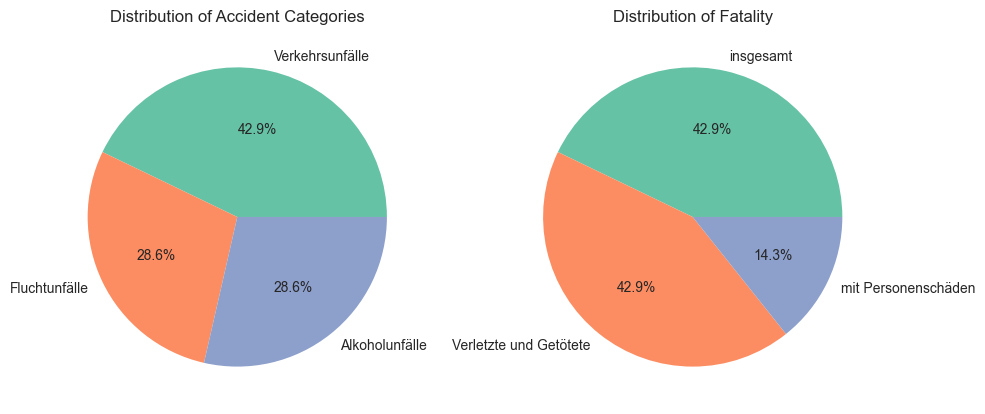

In [14]:
# Distribution of categories and types
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Category distribution
category_counts = c_df['Category'].value_counts()
axes[0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Accident Categories')

# Type distribution
type_counts = c_df['Type'].value_counts()
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Fatality')

plt.tight_layout()
plt.show()

## Heatmap for Correlation between Numeric Features

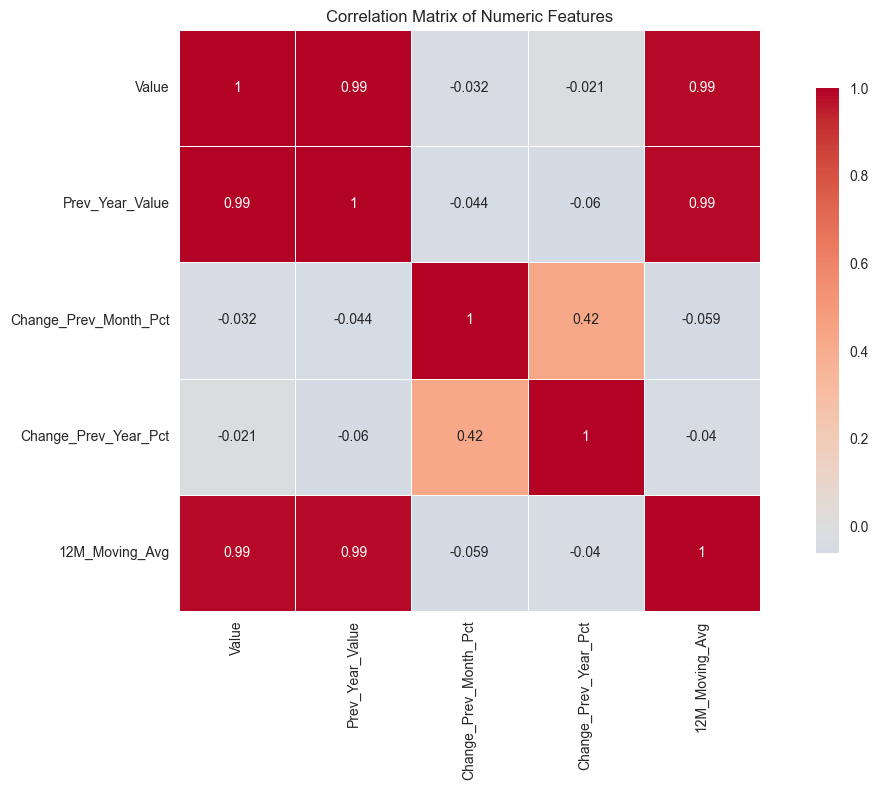

Correlation matrix:
                       Value  Prev_Year_Value  Change_Prev_Month_Pct  \
Value                  1.000            0.992                 -0.032   
Prev_Year_Value        0.992            1.000                 -0.044   
Change_Prev_Month_Pct -0.032           -0.044                  1.000   
Change_Prev_Year_Pct  -0.021           -0.060                  0.424   
12M_Moving_Avg         0.990            0.990                 -0.059   

                       Change_Prev_Year_Pct  12M_Moving_Avg  
Value                                -0.021           0.990  
Prev_Year_Value                      -0.060           0.990  
Change_Prev_Month_Pct                 0.424          -0.059  
Change_Prev_Year_Pct                  1.000          -0.040  
12M_Moving_Avg                       -0.040           1.000  


In [15]:
numeric_cols = ['Value', 'Prev_Year_Value', 'Change_Prev_Month_Pct', 'Change_Prev_Year_Pct', '12M_Moving_Avg']
numeric_df = c_df[numeric_cols].dropna()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix.round(3))

<Figure size 1400x800 with 0 Axes>

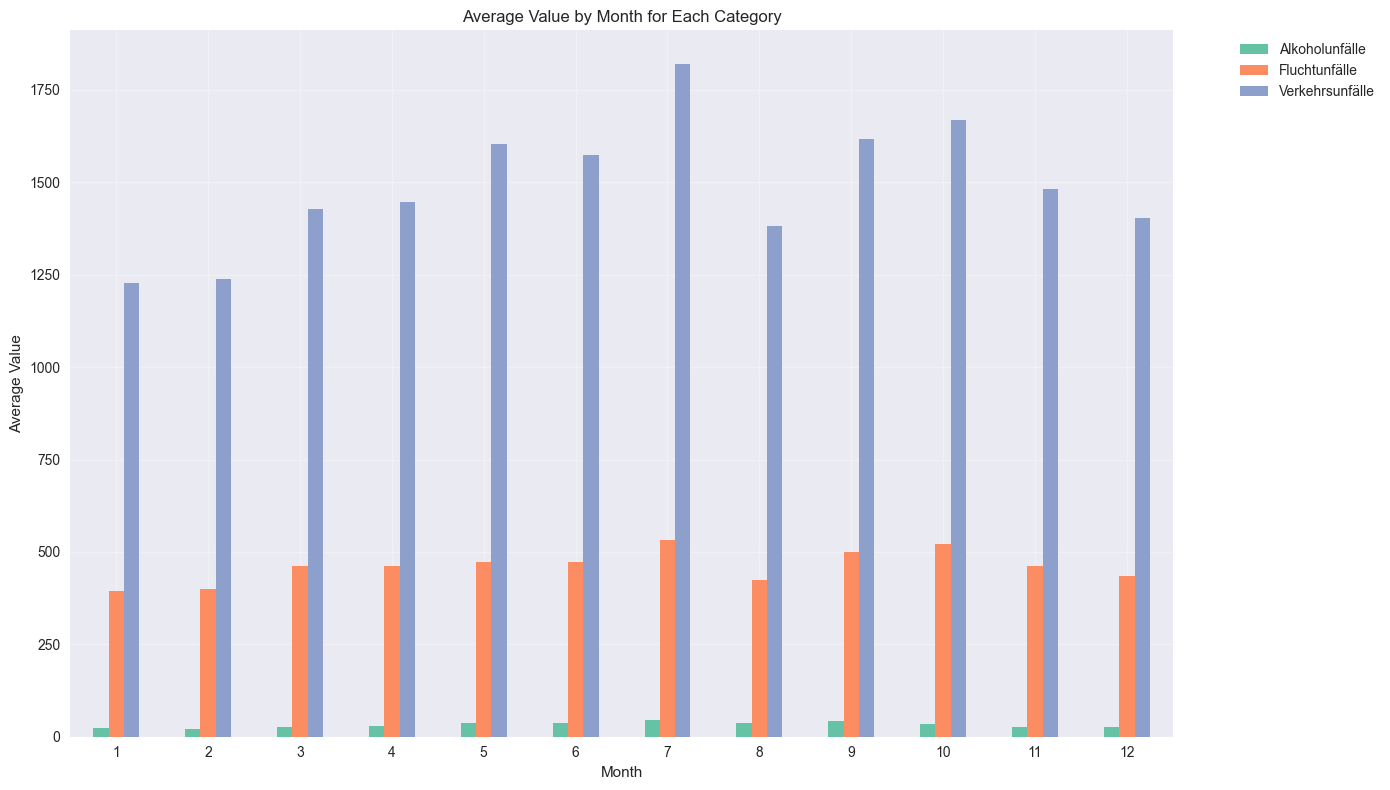

In [16]:
seasonal_patterns = c_df.groupby(['Category', 'Month'])['Value'].mean().unstack(level=0)

plt.figure(figsize=(14, 8))
seasonal_patterns.plot(kind='bar', figsize=(14, 8))
plt.title('Average Value by Month for Each Category')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

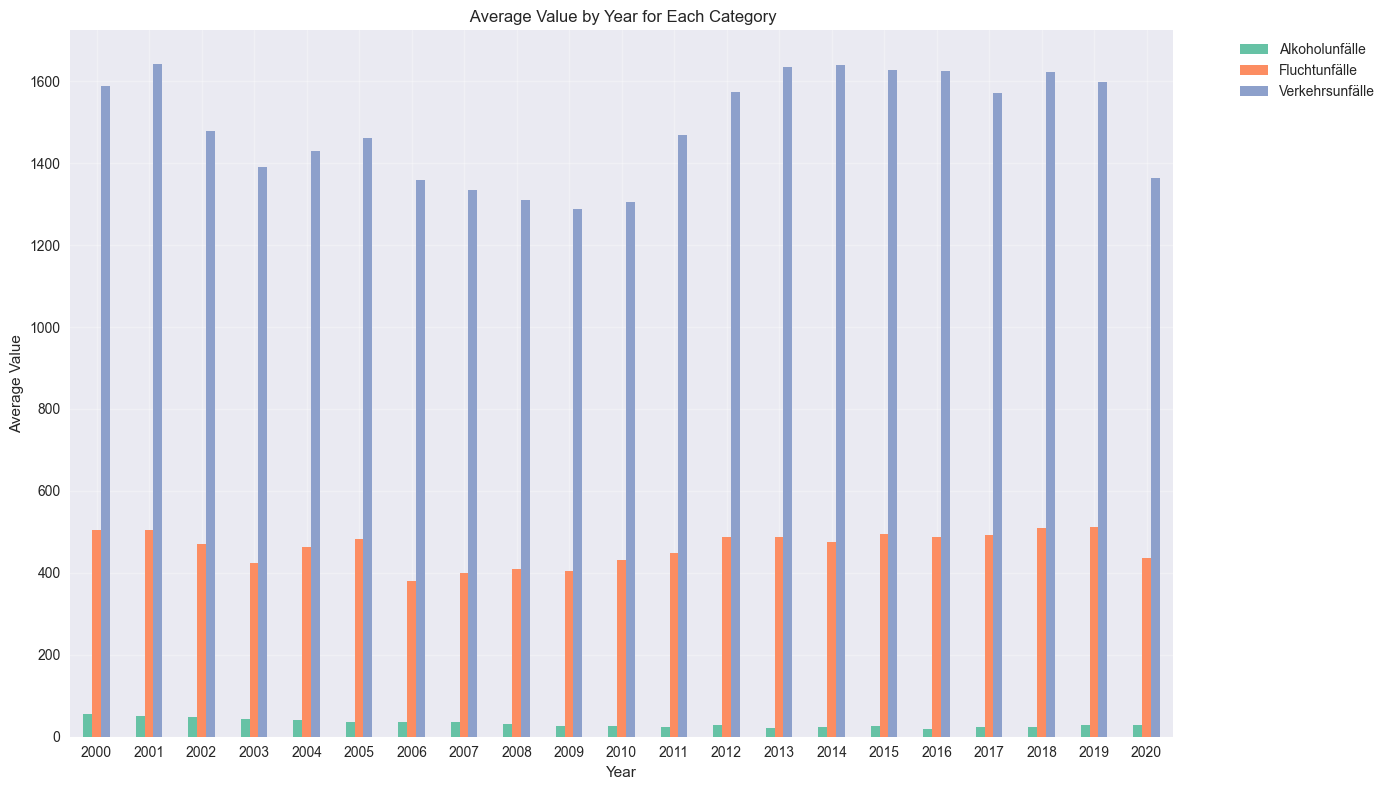

In [17]:
seasonal_patterns = c_df.groupby(['Category', 'Year'])['Value'].mean().unstack(level=0)

plt.figure(figsize=(14, 8))
seasonal_patterns.plot(kind='bar', figsize=(14, 8))
plt.title(' Average Value by Year for Each Category')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Average Accidents by Month


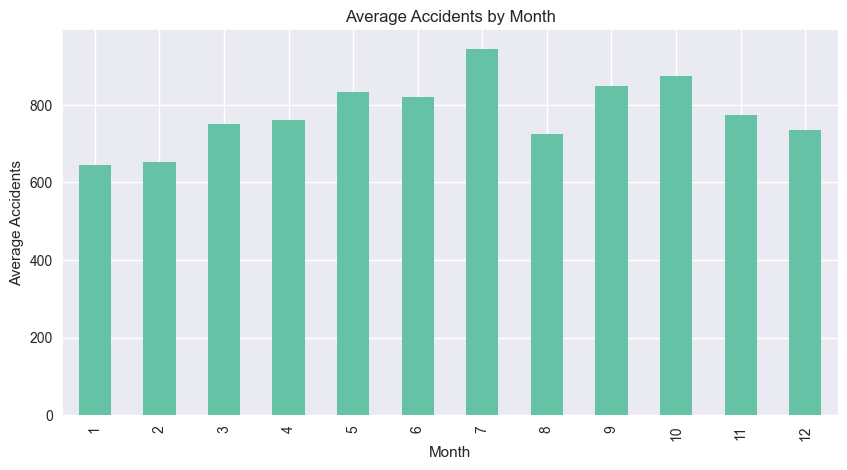

In [18]:


monthly_avg = c_df.groupby("Month")["Value"].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind="bar")
plt.title("Average Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Average Accidents")
plt.show()

## Average Accidents by Year

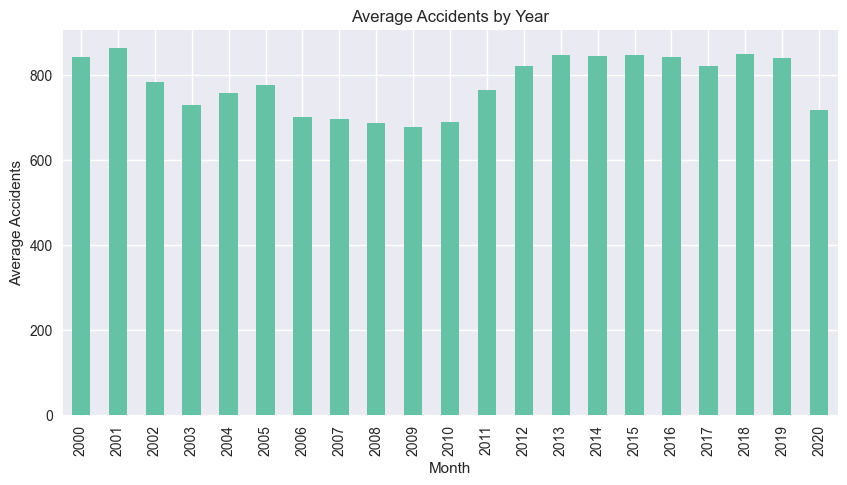

In [19]:
monthly_avg = c_df.groupby("Year")["Value"].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind="bar")
plt.title("Average Accidents by Year")
plt.xlabel("Month")
plt.ylabel("Average Accidents")
plt.show()

## Accident Outcomes Trends

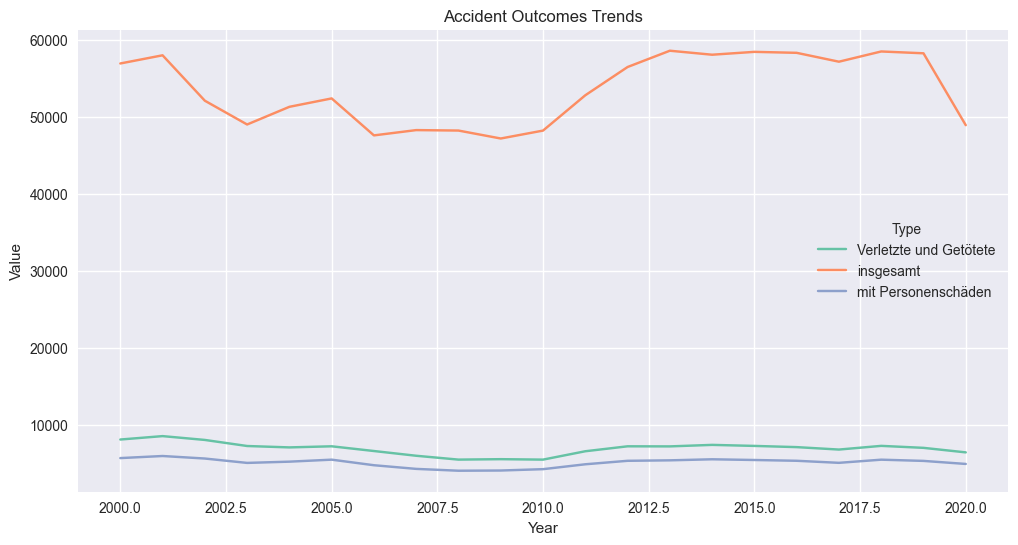

In [20]:
category_year = c_df.groupby(["Year", "Type"])["Value"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=category_year, x="Year", y="Value", hue="Type")
plt.title("Accident Outcomes Trends")
plt.show()

## Challenge Goal - visualise historically the number of accidents per category 

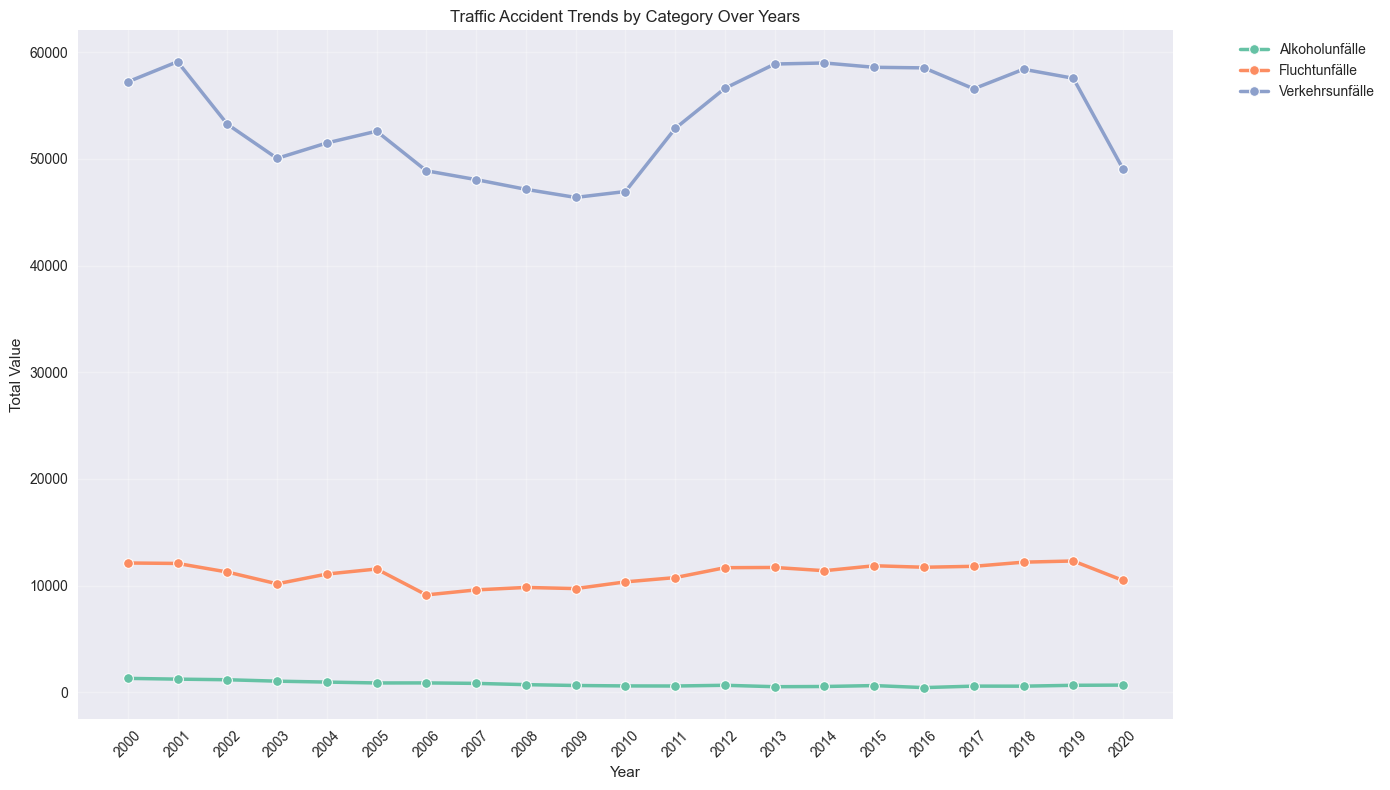

In [21]:
category_year1 = c_df.groupby(["Year", "Category"])["Value"].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=category_year1, x="Year", y="Value", hue="Category", linewidth=2.5, marker='o')
plt.title("Traffic Accident Trends by Category Over Years")
plt.xlabel("Year")
plt.ylabel("Total Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
all_years = sorted(c_df['Year'].unique())
plt.xticks(ticks=all_years, labels=[str(year) for year in all_years], rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Verkehrsunfälle dominate total accidents, but show a gentle decline from around 2000 to 2010, followed by a rise and renewed fluctuation after 2012.​

Fluchtunfälle stay between roughly 9,000–12,000 per year, with a dip around 2006 and a mild upward trend in the 2010s.​

Alkoholunfälle are much lower in magnitude, gradually decreasing overall, which suggests some effectiveness of alcohol-related road safety measures over time.